## Project Overview
For this project, we will perform regression modeling to analyze house sales in King County using the provided dataset kc_house_data.csv. Our goal is to provide insights into how various features of a house influence its sale price, which can be valuable for a real estate agency advising homeowners on potential home renovations and their impact on home value.

## Ojectives

Optimizing House Pricing Strategies

Estimating Renovation Impact on House Value

Identifying Factors Influencing House Sale Speed

Predicting the Optimal Time to Sell a House


## Importing necessary libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings


warnings.filterwarnings('ignore')

## Reading the data sets

In [4]:
# reading the kc house data into a data frame called df
df =pd.read_csv('C:/Users/user/Documents/Phase_2/Phase2_Project/dsc-group-6-phase-2-project/data/kc_house_data.csv')
df.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Exploratory Data Analysis (EDA)

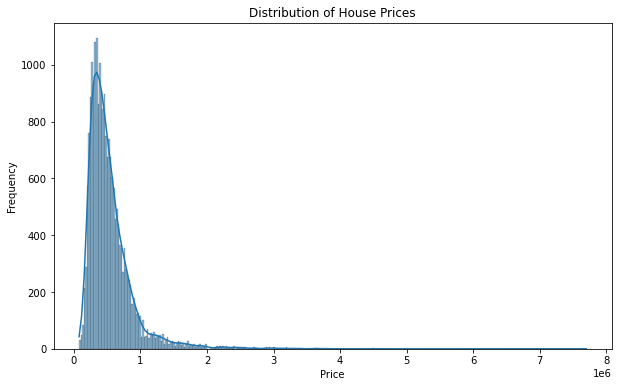

In [7]:
# Plot the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The house prices are right-skewed, indicating that most houses are priced on the lower end, with a few very high-priced houses.


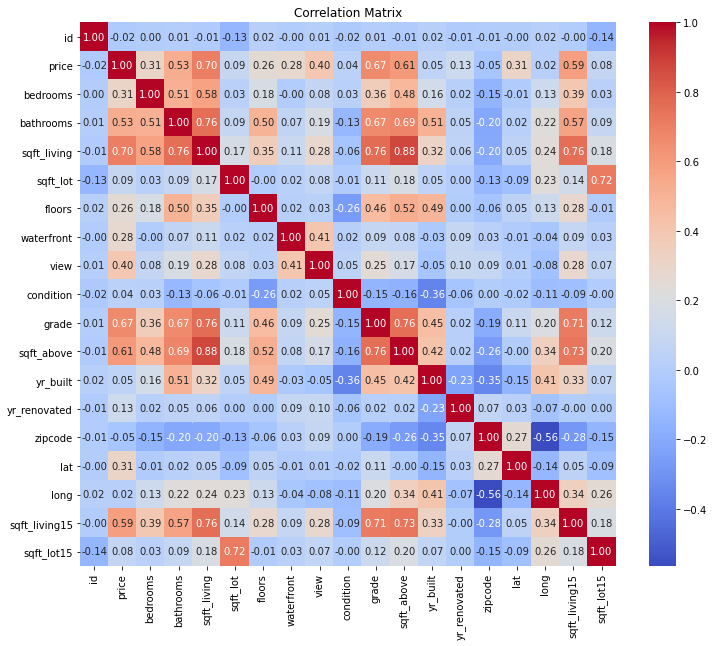

In [8]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


<b>Obesrvation from correlation corr_matrix <b>

There is a strong positive correlation between sqft_living and price.

grade and sqft_above also show significant positive correlations with price.

Features like bathrooms and sqft_living15 also correlate positively with price.

In [9]:
# Correcting data types (example: converting date column to datetime)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')


In [10]:
# Handle missing values
df['waterfront'].fillna(0, inplace=True)  # Assuming NaN means no waterfront
df['view'].fillna(0, inplace=True)        # Assuming NaN means no view
df['yr_renovated'].fillna(0, inplace=True)  # Assuming NaN means no renovation
df['sqft_basement'].fillna(0, inplace=True) # assuming Nan means no basement

In [11]:
# Convert date column to datetime
df['date']=pd. to_datetime (df['date'])

In [12]:
# Encode categorical variables
df['waterfront'] =df['waterfront'].astype('category')

In [13]:
#df['sqft_basement'] .unique()

In [14]:
# Nomalize the  numerical columns data 
scaler =StandardScaler () # initialize the standard scaller
numerical_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Normalization and standardization are techniques used to rescale numerical features so they have similar scales, which can improve the performance and training stability of machine learning models

In [15]:
# cleaned dataset lets call it data
df.head()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  category      
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Model 1

Identify the most relevant features for predicting house prices

In [16]:
# Future Selection
# Selecting relevant features for regression modeling
# removed 'sqft_basement', because its an object shall review it
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement','yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = df [selected_features]
y = df['price']

In [17]:
#Model training
# Split the data into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.2,random_state=42)
#Train a linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

# Predict on the test set
y_pred = model.predict(X_test)



## Model Evaluation

In [18]:
#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 39851558217.47511
R2 Score: 0.6939587109786203


The R2 score indicates that the model explains approximately 69% of the variance in the house prices, which is a reasonably good fit for the data.

### Visualization

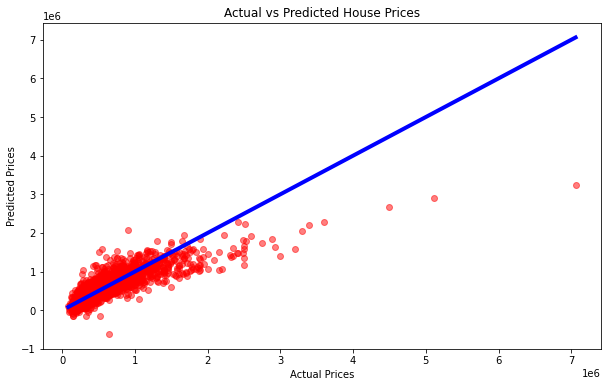

In [19]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4, color='blue')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [57]:
# Importing libraries for linear regression modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Optional: Importing Statsmodels for detailed regression results
import statsmodels as sm
from statsmodels.formula.api import ols 

In [82]:
formula = 'y~X'
model = ols (formula,df2).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     3321.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:41:20   Log-Likelihood:            -2.9873e+05
No. Observations:               21597   AIC:                         5.975e+05
Df Residuals:                   21588   BIC:                         5.975e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.205e+05   1.52e+04    -34.225      0.000    -5.5e+05   -4.91e+05
X[0]       -4.241e+04   2294.649    -18.482      0.000   -4.69e+04   -3.79e+04
X[1]       -2.237e+04   3727.422     -6.002      0.000   -2.97e+04   -1.51e+04
X[2]         221.7185     22.001     10.077      0.000     178.594     264.843
X[3]          -0.2858      0.042     -6.870      0.000      -0.367      -0.204
X[4]       -1.332e+04   4172.862     -3.193      0.001   -2.15e+04   -5143.598
X[5]        1.083e+05   2410.449     44.943      0.000    1.04e+05    1.13e+05
X[6]         -17.2751     21.968     -0.786      0.432     -60.333      25.783
X[7]          54.1201     21.879      2.474      0.013      11.236      97.004
==============================================================================
Omnibus:                    16451.529   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           911551.918
Skew:                           3.169   Prob(JB):                         0.00
Kurtosis:                      34.190   Cond. No.                     4.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
len(df2.columns)

12

In [79]:
correlations = df2.drop(['price','yr_built','yr_renovated'], axis=1).corr().sum() / (len(df2.columns))
correlations 

bedrooms         0.286359
bathrooms        0.374351
sqft_living      0.410772
sqft_lot         0.133615
floors           0.230882
grade            0.356718
sqft_above       0.371294
sqft_basement    0.157684
dtype: float64

In [69]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.008188,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.249082,-0.146896,1.000000,0.756073,0.165843,0.447865,0.015623,-0.185771,0.113575,0.200341,0.713867,0.120981


In [53]:
# Define the target variable and features
#X = df_with_final_model_columns.drop(columns=['price'])
#y = df_no_outliers_no_missing_values['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Initialize and fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 39859951746.00499
Mean Absolute Error: 125793.37566226469
R-squared: 0.6938942526134868


In [55]:
model.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

##  model 2  after dropping some variables

Results shows that model 1 is better

In [65]:
# Drop unnecessary columns
df2 = df.drop(columns=['id', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view', 'waterfront', 'condition', ])

Mean Squared Error: 60283357521.72003
R2 Score: 0.5370520685338268


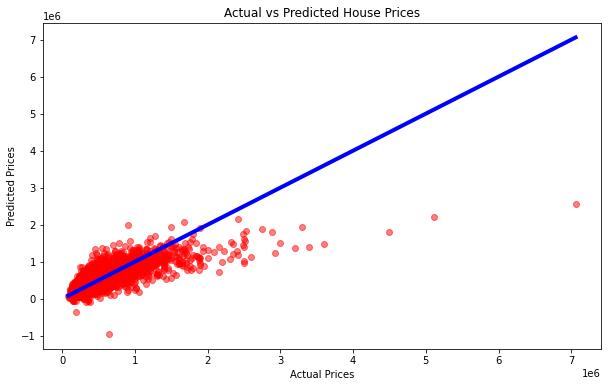

In [81]:
# Future Selection
# Selecting relevant features for regression modeling
# removed 'sqft_basement', because its an object shall review it
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',  'grade', 'sqft_above','sqft_basement']
X = df2 [selected_features]
y = df2['price']

#Model training
# Split the data into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.2,random_state=42)
#Train a linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

# Predict on the test set
y_pred = model.predict(X_test)

#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4, color='blue')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()




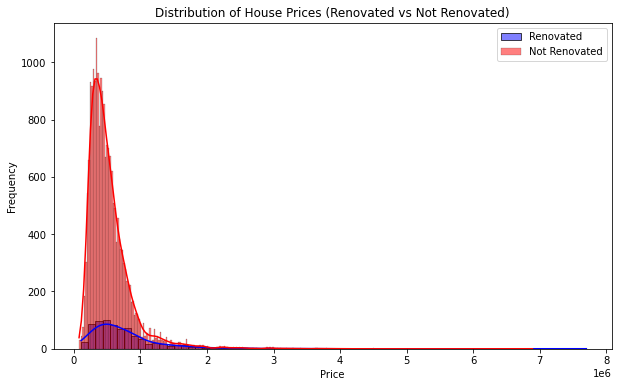

Mean Squared Error: 39859951746.00499
R2 Score: 0.6938942526134868


NameError: name 'example_features' is not defined

In [22]:

# Analyze the impact of renovations on house prices
renovated = df[df['yr_renovated'] > 0]
not_renovated = df[df['yr_renovated'] == 0]

plt.figure(figsize=(10, 6))
sns.histplot(renovated['price'], kde=True, color='blue', label='Renovated')
sns.histplot(not_renovated['price'], kde=True, color='red', label='Not Renovated')
plt.title('Distribution of House Prices (Renovated vs Not Renovated)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 3: Modeling and Prediction
# Select features and target
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
target = 'price'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Step 4: ROI Calculation
# Calculate the mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Example: Estimating the impact of adding a bathroom
def estimate_renovation_impact(features, renovation_type, increase):
    features[renovation_type] += increase
    return model.predict([features])[0]


# Estimate the impact of adding a bathroom
new_price = estimate_renovation_impact(example_features, features.index('bathrooms'), 1)
print(f"Price after adding a bathroom: ${new_price:.2f}")
print(f"Estimated increase in price: ${new_price - initial_price:.2f}")

# Step 5: Visualization and Reporting
# Visualizing the impact of renovations
renovations = ['bathrooms', 'bedrooms', 'sqft_living', 'sqft_basement']
impacts = []

for renovation in renovations:
    new_price = estimate_renovation_impact(example_features, features.index(renovation), 1)
    impacts.append(new_price - initial_price)

impact_df = pd.DataFrame({'Renovation': renovations, 'Estimated Increase in Price': impacts})

plt.figure(figsize=(10, 6))
sns.barplot(x='Renovation', y='Estimated Increase in Price', data=impact_df)
plt.title('Estimated Impact of Renovations on House Price')
plt.xlabel('Renovation Type')
plt.ylabel('Estimated Increase in Price ($)')
plt.show()